# Keras Tutorial

np.random.seed allows use to reproduce the results we get

In [12]:
import numpy as np
np.random.seed(123)

Sequential model is a linear stack of neural network layers

In [13]:
from keras.models import Sequential

Import core layers of keras

In [14]:
from keras.layers import Dense, Dropout, Activation, Flatten

Next, import the CNN layers

In [15]:
from keras.layers import Convolution2D, MaxPooling2D

In [16]:
from keras.utils import np_utils

Import MNIST dataset from keras

In [17]:
from keras.datasets import mnist

# pre-shuffled MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print(X_train.shape)

(60000, 28, 28)


Plot a sample data from the se

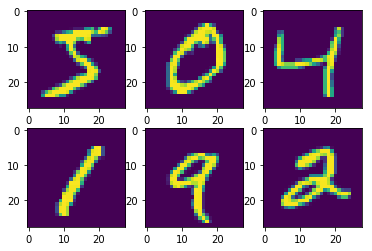

[5 0 4 1 9 2]


In [19]:
from matplotlib import pyplot as plt

ax1 = plt.subplot(231)
ax1.imshow(X_train[0])

ax2 = plt.subplot(232)
ax2.imshow(X_train[1])

ax3 = plt.subplot(233)
ax3.imshow(X_train[2])

ax4 = plt.subplot(234)
ax4.imshow(X_train[3])

ax5 = plt.subplot(235)
ax5.imshow(X_train[4])

ax6 = plt.subplot(236)
ax6.imshow(X_train[5])

plt.show()

print(y_train[:6])

Theano requires the user to specify the depth of the input image. A full color image would have a depth of 3 (RGB) but the data from MNIST only has a depth of 1. We must change the dimension of our dataset with depth 1.

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

We must normalize our value to the range [0,1], so we change the data type to float then divide each value by 255

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Change the y dataset so that instead of it being a 1 dimensional array, we have 10 distinct class labels represented as a 60000 by 10 matrix

In [24]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
Y_train[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

We declare a sequential model and add in the input layer. The input shape is the same as the shape of a sample, and the first 3 parameters represent the number of convolution filters to use, and the number of rows/columns in each convolution kernel.

In [26]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation="relu", input_shape=(28,28,1)))

In [27]:
print(model.output_shape)

(None, 26, 26, 32)


The drop out layer allows for the network to avoid overfitting.

In [28]:
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [29]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 147s - loss: 0.0603 - acc: 0.9818   
Epoch 2/10
60000/60000 [==============================] - 148s - loss: 0.0502 - acc: 0.9847   
Epoch 3/10
60000/60000 [==============================] - 136s - loss: 0.0429 - acc: 0.9866   
Epoch 4/10
60000/60000 [==============================] - 140s - loss: 0.0360 - acc: 0.9885   
Epoch 5/10
60000/60000 [==============================] - 133s - loss: 0.0334 - acc: 0.9899   
Epoch 6/10
60000/60000 [==============================] - 133s - loss: 0.0296 - acc: 0.9906   
Epoch 7/10
60000/60000 [==============================] - 134s - loss: 0.0279 - acc: 0.9912   
Epoch 8/10
60000/60000 [==============================] - 133s - loss: 0.0277 - acc: 0.9909   
Epoch 9/10
60000/60000 [==============================] - 144s - loss: 0.0242 - acc: 0.9922   
Epoch 10/10
60000/60000 [==============================] - 147s - loss: 0.0227 - acc: 0.9927   


In [33]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
score

[0.030202305753031032, 0.99209999999999998]